# DSCI 503 - Homework 04
### Symphony Hopkins

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [2]:
x = np.array([10,16,26,12,17,22,14,12,21,16])
n = len(x)
mean = sum(x)/n
diff = x - mean
var = np.sum((diff ** 2))/(n - 1)
print(f'''
Sample Mean:     {mean}
Sample Variance: {var}''')


Sample Mean:     16.6
Sample Variance: 25.6


In [3]:
mean_np = np.mean(x)
var_np = np.var(x, ddof = 1)
print(f'''
Sample Mean:     {mean_np}
Sample Variance: {var_np}''')


Sample Mean:     16.6
Sample Variance: 25.6


## Problem 2: Scoring a Regression Model

In [4]:
def find_sse(true_y, pred_y):
    sse = np.sum((true_y - pred_y)**2)
    return sse

In [5]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

sse_1 = find_sse(true_y,pred_1)
sse_2 = find_sse(true_y,pred_2)

print(f'''
Model 1 SSE: {round(sse_1,2)}
Model 2 SSE: {round(sse_2,2)}''')


Model 1 SSE: 22.66
Model 2 SSE: 19.9


## Problem 3: Scoring a Classification Model

In [6]:
def find_accuracy(true_y, pred_y):
    correct_obs_bool = (true_y == pred_y)
    correct_obs = np.sum(correct_obs_bool.astype(int))
    total_obs = len(true_y)
    accuracy = correct_obs/total_obs
    return accuracy

In [7]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N',
'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N',
'N', 'P', 'N'])

print(f'''
Model Accuracy: {find_accuracy(true_diag,pred_diag)}''')


Model Accuracy: 0.75


In [8]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])

print(f'''
Model Accuracy: {find_accuracy(true_labels,pred_labels)}''')


Model Accuracy: 0.875


## Problem 4: Classification Report

In [9]:
def classification_report(true_y, pred_y):
    
    classes = np.unique(true_y)
    
    accuracy = find_accuracy(true_y, pred_y)
    
    tp = np.sum(np.logical_and(pred_y == classes[1], true_y == classes[1]))
    tn = np.sum(np.logical_and(pred_y == classes[0], true_y == classes[0]))
    fp = np.sum(np.logical_and(pred_y == classes[1], true_y == classes[0]))
    fn = np.sum(np.logical_and(pred_y == classes[0], true_y == classes[1]))
    
    pos_pre = round(tp/(tp + fp), 4)
    pos_re = round(tp/(tp + fn), 4)
    neg_pre = round(tn/(tn + fn), 4)
    neg_re = round(tn/(tn + fp), 4)
    
    results = print(f'''
    Positive Class:     {classes[0]}
    Negative Class:     {classes[1]}
    
    Accuracy:           {round(accuracy,4)}
    Positive Precision: {round(pos_pre, 4)}
    Positive Recall:    {round(pos_re, 4)}
    Negative Precision: {round(neg_pre, 4)}
    Negative Recall:    {round(neg_re, 4)}''')
    
 

In [10]:
classification_report(true_diag, pred_diag)


    Positive Class:     N
    Negative Class:     P
    
    Accuracy:           0.75
    Positive Precision: 0.5556
    Positive Recall:    0.8333
    Negative Precision: 0.9091
    Negative Recall:    0.7143


In [11]:
classification_report(true_labels, pred_labels)


    Positive Class:     cat
    Negative Class:     dog
    
    Accuracy:           0.875
    Positive Precision: 0.8333
    Positive Recall:    0.9091
    Negative Precision: 0.9167
    Negative Recall:    0.8462


## Problem 5: Transformation of Random Variables

In [12]:
np.random.seed(1)

X = np.random.normal(loc = 0, scale = 0.4, size = 25000)
Y = np.exp(X)

X_mean = np.mean(X)
X_std = np.std(X, ddof = 1)

Y_mean = np.mean(Y)
Y_std = np.std(Y, ddof = 1)

print(f'''
Sample Mean of X:    {round(X_mean, 4)}
Sample Std Dev of X: {round(X_std, 4)}
Sample Mean of Y :   {round(Y_mean, 4)}
Sample Std Dev of Y: {round(Y_std, 4)}''')


Sample Mean of X:    0.0025
Sample Std Dev of X: 0.4002
Sample Mean of Y :   1.0862
Sample Std Dev of Y: 0.4537


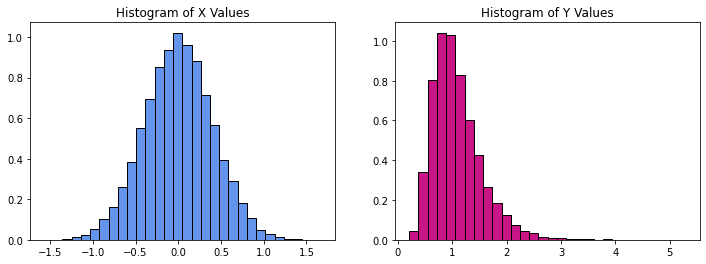

In [13]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.hist(X, bins = 30, density=True, edgecolor='black', color='cornflowerblue')
plt.title('Histogram of X Values')

plt.subplot(1, 2, 2)
plt.hist(Y, bins = 30, density=True, edgecolor='black', color='mediumvioletred')
plt.title('Histogram of Y Values')
plt.show()


In [14]:
prob_less_than_05 = np.mean(Y < 0.5)
prob_less_than_1 = np.mean(Y < 1)
prob_less_than_2 = np.mean(Y < 2)

print(f'''
Probability that Y is less than 0.5: {round(prob_less_than_05, 4)}
Probability that Y is less than 1.0: {round(prob_less_than_1, 4)}
Probability that Y is less than 2.0: {round(prob_less_than_2, 4)}
''')


Probability that Y is less than 0.5: 0.041
Probability that Y is less than 1.0: 0.4969
Probability that Y is less than 2.0: 0.9574



## Problem 6: Stochastic Linear Relationships

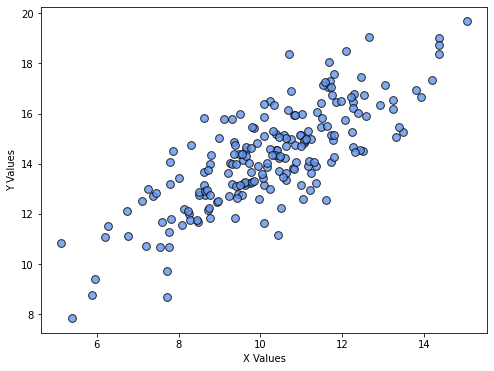

In [15]:
np.random.seed(1)

x_vals = np.random.normal(loc = 10, scale = 2, size = 200)
errors = np.random.normal(loc = 0, scale = 1.2, size = 200)
y_vals = 5.1 + 0.9 * x_vals + errors

fig = plt.figure(figsize=[8, 6])
plt.scatter(x_vals, y_vals, s = 60, alpha = 0.8, edgecolor='black', color='cornflowerblue')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

In [16]:
diff_x = np.mean(x_vals) - x_vals
diff_y = np.mean(y_vals) - y_vals

r_top = np.sum(diff_x * diff_y)
r_bot = np.sqrt(np.sum(diff_x**2) * np.sum(diff_y**2))
r = r_top/r_bot
print(f'''
Correlation between X and Y: {round(r, 4)}''')



Correlation between X and Y: 0.7861


## Problem 7: Relationship between Life Expectancy and Per Capita GDP

In [17]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t') 
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [18]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['red', 'yellow', 'lime', 'blue']

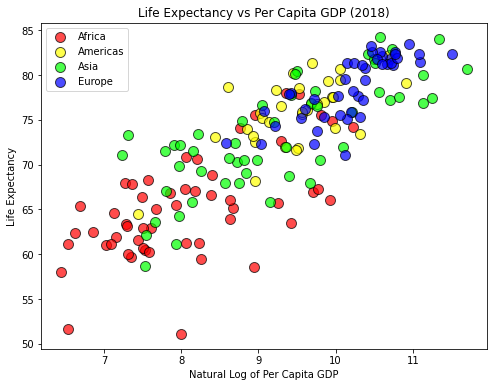

In [19]:
plt.figure(figsize=[8,6])

for item, color in zip(continent_list, color_list):
    
    
    sel = np.logical_and(continent == item, year == 2018) 
        
    x = np.log(pcgdp[sel])
    y = life_exp[sel]
    
    plt.scatter(x = x, y = y, s=100, alpha=0.7, color = color, edgecolor='black', label = item.title())
    
    
plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.legend()

plt.show()
    

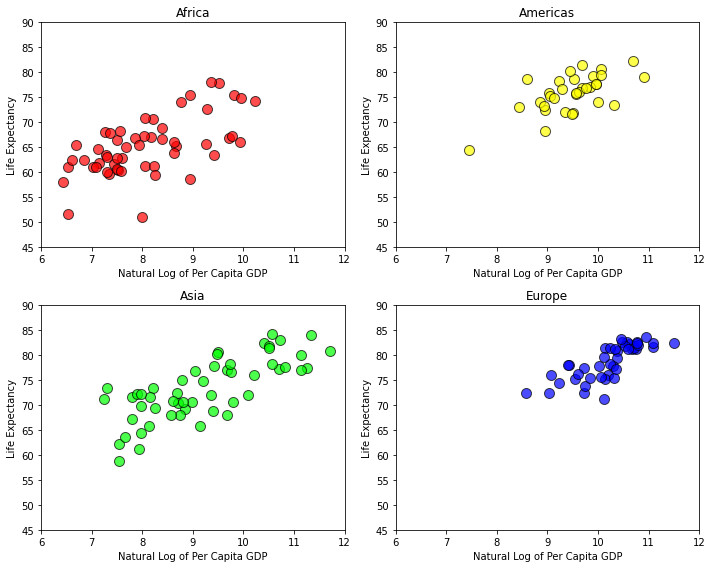

In [20]:
plt.figure(figsize=[10,8])

for index in range(0,len(continent_list)):
    
    plt.subplot(2,2,index + 1)
    
    sel = np.logical_and(continent == continent_list[index], year == 2018) 
        
    x = np.log(pcgdp[sel])
    y = life_exp[sel]
    
    plt.scatter(x = x, y = y, s=100, alpha=0.7, color = color_list[index], edgecolor='black')
    
    plt.xlim([6,12])
    plt.ylim([45,90])
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.title(continent_list[index].capitalize())

plt.tight_layout()
plt.show()




## Problem 8: Trends by Country

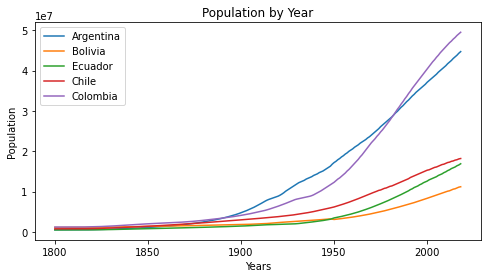

In [21]:
country_list = ['Argentina', 'Bolivia', 'Ecuador','Chile', 'Colombia']

plt.figure(figsize=[8,4])

for item in country_list:
    
    bool_array = (country == item)
    pop = population[bool_array]
        
    x = range(1800, 2019)
    y = pop
    
    plt.plot(x, y)
    
    
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')
plt.legend(country_list)

plt.show()

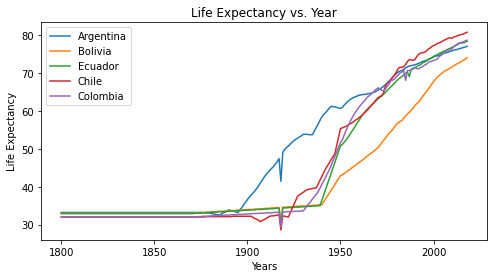

In [22]:
country_list = ['Argentina', 'Bolivia', 'Ecuador','Chile', 'Colombia']

plt.figure(figsize=[8,4])

for item in country_list:
    
    bool_array = (country == item)
    pop = life_exp[bool_array]
        
    x = range(1800, 2019)
    y = pop
    
    plt.plot(x, y)
    
    
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Year')
plt.legend(country_list)

plt.show()